<a href="https://colab.research.google.com/github/tarunchaudhary1/ml_learning/blob/main/1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df["class"] = (df["class"] == "g").astype(int)

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


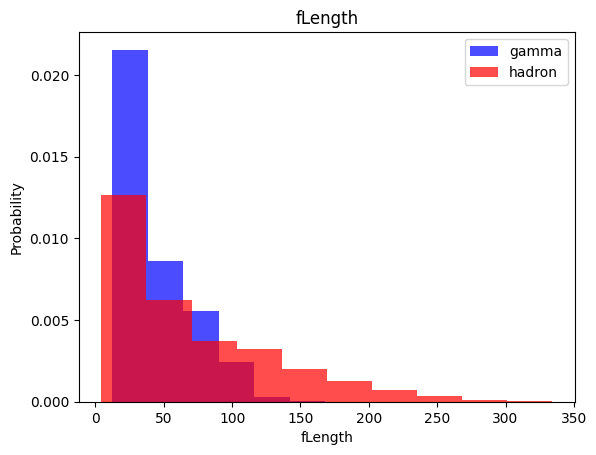

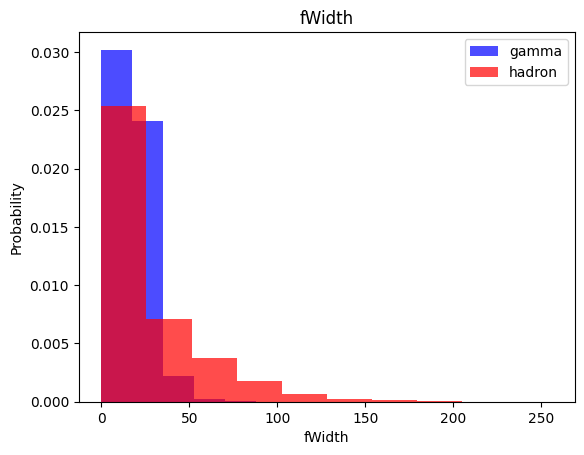

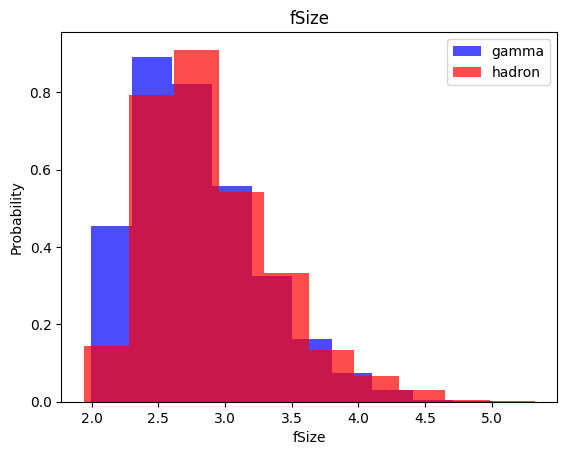

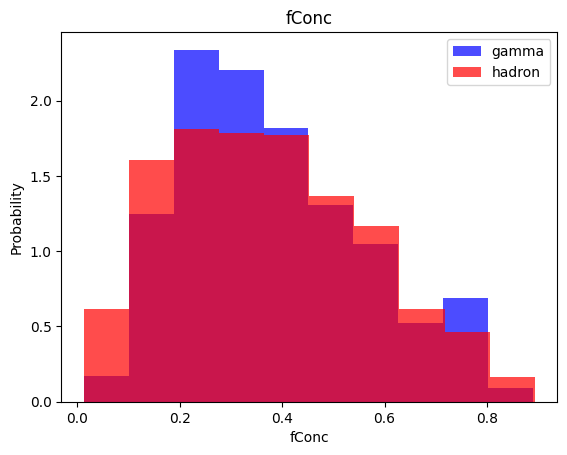

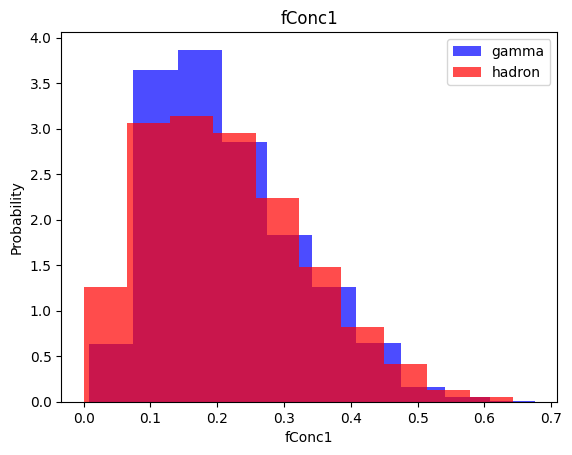

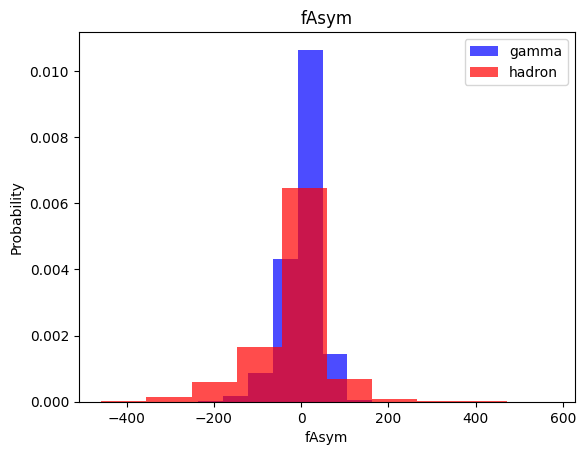

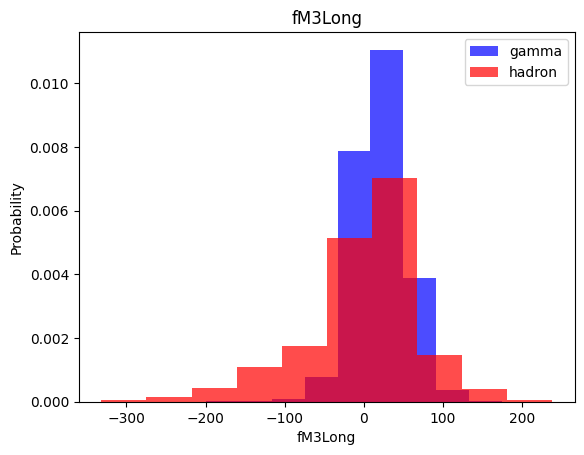

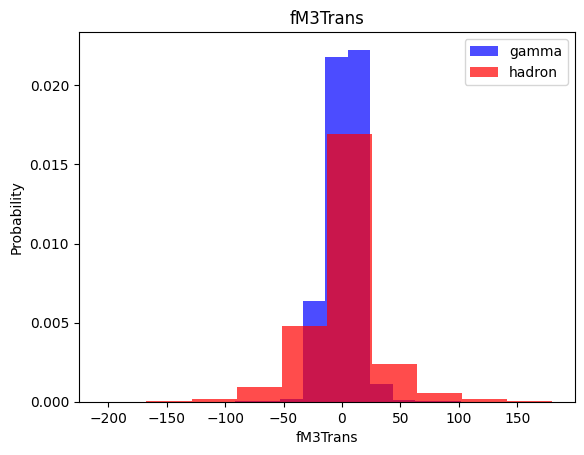

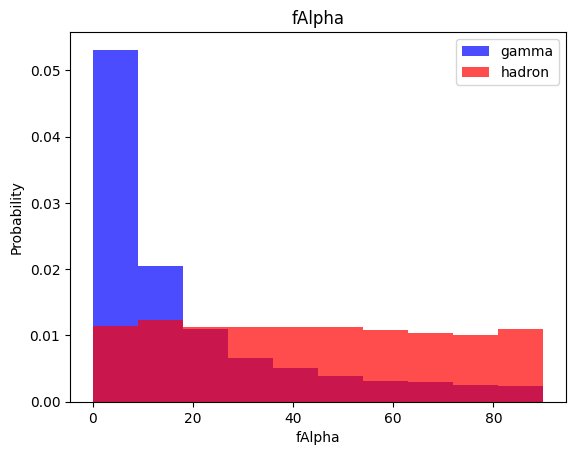

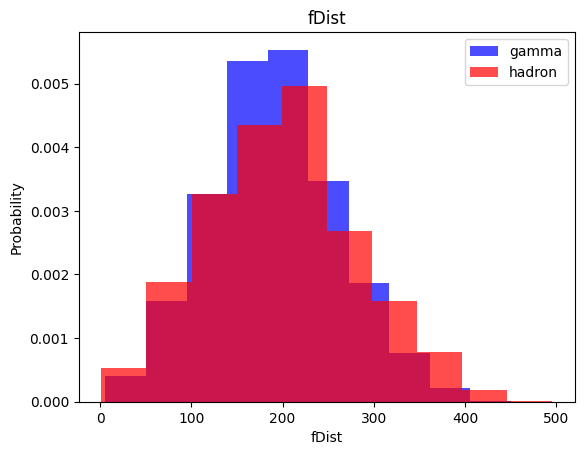

In [9]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [10]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def scale_dataset(dataframe,oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler();
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))));
  return data,x,y

In [12]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# Knn

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [15]:
y_pred = knn_model.predict(x_test)

In [16]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1338
           1       0.84      0.89      0.86      2466

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.82      0.81      3804



In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [20]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.52      1338
           1       0.74      0.90      0.81      2466

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



#SVM

In [21]:
from sklearn.svm import SVC


In [22]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [23]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1338
           1       0.90      0.90      0.90      2466

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



#Neural Networks

In [24]:
import tensorflow as tf

In [35]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'],label = 'loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

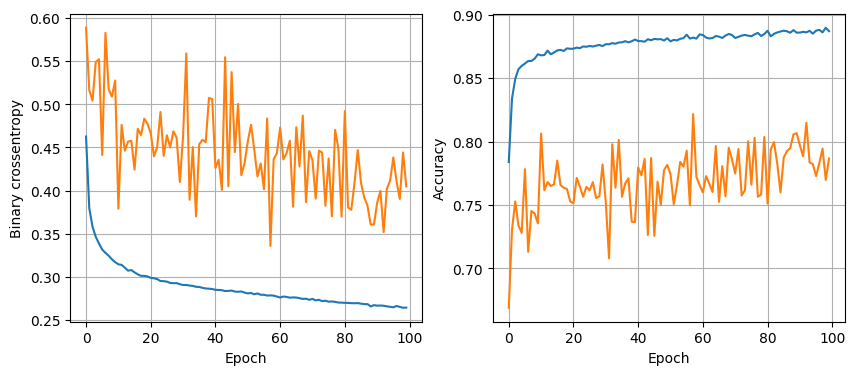

In [36]:
plot_history(history)

In [38]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation = 'relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(
    x_train,y_train,
    epochs = epochs, batch_size = batch_size, validation_split = 0.2,verbose = 0
  )

  return nn_model,history

64 nodes, dropout 0.2, lr 0.005, batch_size 128


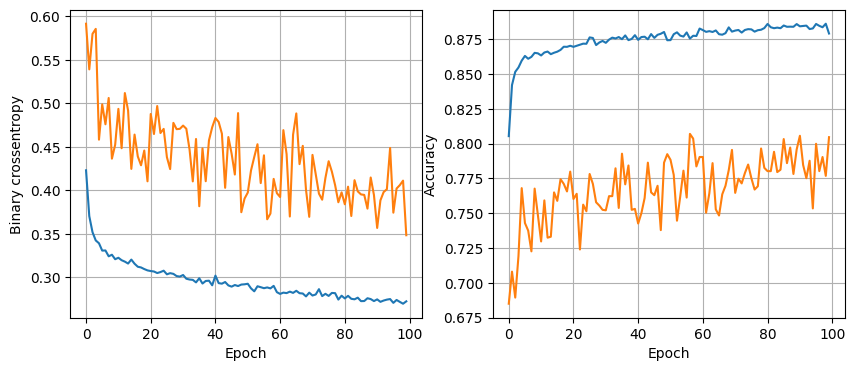

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8696 - loss: 0.3113
64 nodes, dropout 0.2, lr 0.0001, batch_size 128


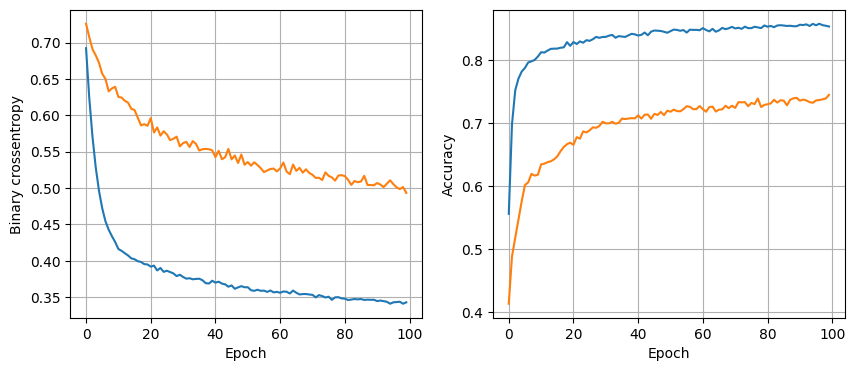

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8553 - loss: 0.3377


In [41]:
epochs = 100
least_val_loss = float('inf')
least_loss_model = None
for num_nodes in [64]:
  for dropout_prob in [0.2]:
    for lr in [0.005,0.0001]:
      for batch_size in [128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [42]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1338
           1       0.89      0.94      0.91      2466

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

